# Learning Objectives

#### ✔ **Familiarity with plotnine/ggplot** 

Pratice making charts in plotnine. Get comfortable with the tool, we're going to keep using it! 

#### ✔ **Exploratory Data Viz -- Interpreting data** 

Once you plot a chart (for example a scatter plot with a very strong correlation), it can be tempting to start drawing conclusions. But beware! What conclusions can you draw? What conclusions can't you draw? Be careful with your words as you interpret the chart. Even good data, if interpreted incorrectly, can be misleading, and can ultimately lead you to tell an incorrect or misleading story.

## Mtcars

According to the [documentation of mtcars we found by Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), this dataset was built with a few questions in mind.

> The following table is a discussion of variables in the R mtcars dataset. It was developed in response to the Coursera Regression Models class in the Data Science Specialization taught by Prof. Brian Caffo for the course project assignment: “You work for Motor Trend, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions: ‘Is an automatic or manual transmission better for MPG’ and ‘Quantify the MPG difference between automatic and manual transmissions’”


You don't yet have the right mathematical tools to answer those questions. But exploratory data viz is a good first step in 1) defining what the questions you have and 2) getting a sense of the scope of the dataset and the "shape" of the data. In this notebook, I'd like for you to use the tools you have to explore the mtcars dataset. Eventually we will get around to trying to answer the questions he lays out. For now, focus on exploring the data, asking qusetions of it, and using plots to help answer the questions. Intepret the results of your plots carefully! 

Here is the dataset. I've added a column to make the `am` variable more human readable. You may want to do the same for a few other columns too if you plan to put them in your charts:

In [1]:
from plotnine.data import mtcars
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth

# give transmission_type a human readable name rather than 0 or 1
mtcars['transmission_type'] = mtcars['am']\
    .apply(lambda x: {0: 'automatic', 
                      1: 'manual'}[x])

mtcars.rename(columns={'gear': 'number_gears', 'cyl': 'number_cylinders'}, inplace=True)
  
# Extract `brand` from name
mtcars['brand'] = mtcars['name'].str.split(expand=True)[0]
mtcars = mtcars.drop('am',axis='columns')
# Display the dataset
mtcars.head()

,name,mpg,number_cylinders,disp,hp,drat,wt,qsec,vs,number_gears,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,automatic,Hornet


# Exploring data

Remember, take a look at the data itself, calculate summary statistics if you find them useful, google for context to learn about what the variables mean, use histograms/scatterplots/etc... If you need, you can also add columns like I have done above. You won't fully wrap your head around the dataset (yet!) until we get to regressions, but let's see what you can tell us about it with your exploratory data viz.

Keeping in mind some of the resources we have to consult, including (but not limited to!):

- Official [plotnine documentation](https://plotnine.readthedocs.io/en/stable/)
- The [documentation of mtcars we found](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html) that someone had helpfully compiled
- Jonathan Soma's [plotnine reference guide](https://jsoma.github.io/plotnine-reference/chart-types/bar-graph/)
- Chatting with your classmates
- Official [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/)
- Various online tutorials or YouTube videos on plotnine/ggplot2
- Forums like StackOverflow
- Google

Let's start doing some exploratory data visualization with plotnine! Take a look at the example below:

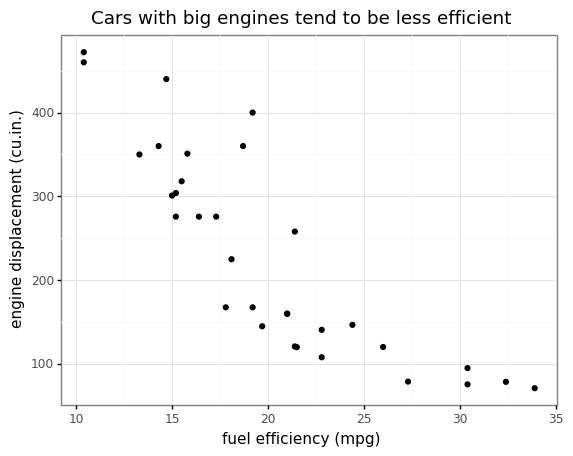

<ggplot: (310980353)>

In [2]:
display(
    ggplot(mtcars,                   # data
        aes('mpg', 'disp'))          # aesthetics
        + geom_point()               # geometry
        + theme_bw()
        + labs(
            title = "Cars with big engines tend to be less efficient",
            y = "engine displacement (cu.in.)",
            x = "fuel efficiency (mpg)"
        )
)   

**Summary:**

According to [Soren Heitmann](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html), the engine displacement of a car is a good proxy for the total amount of power the engine can generate. As you can see in the chart above, among the cars that Motor Trend looked at, those with that generated more power tended to be less fuel efficient.

**Reflection**

What I can conclude based on this chart:
- Among the cars that motortrend analyzied, the cars with bigger engines have lower fuel efficiency
- Bigger engines are correlated with lower fuel efficiency

What I can't conclude based on this chart:
- Bigger engines are less efficient. 
    - In order to come to this conclusion, I would also need to 👉calculate a regression

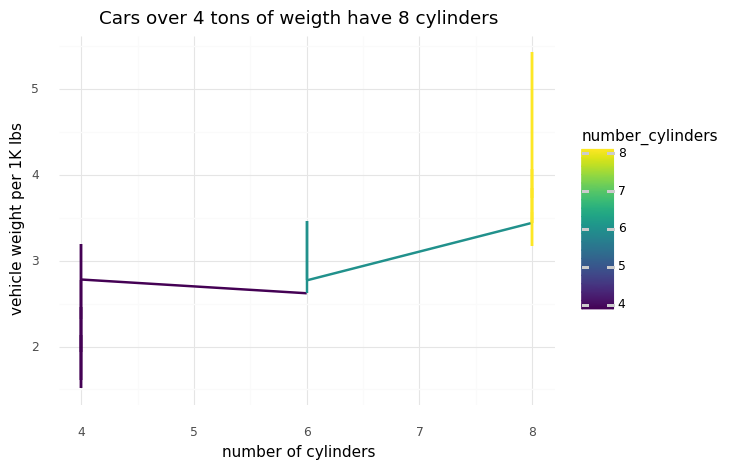

<ggplot: (311480330)>

In [11]:
from plotnine import geom_line, theme_minimal
display(
    ggplot(mtcars,             
        aes('number_cylinders', 'wt', color='number_cylinders'))
        + geom_line(size=1)         
        + theme_minimal()
        + labs(
            title = "Cars over 4 tons of weigth have 8 cylinders",
            y = "vehicle weight per 1K lbs",
            x = "number of cylinders"
        )
) 

**👉Chart 1 Summary**

Replace this text with your summary of the chart above. Be _very_ careful with your language. Use language that is as strong as possible, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far.

**👉Reflection**

What I can conclude based on this chart:
- Among the cars analyzed by motortrend, the most heavy one usually have more cylinders.
- Bigger cars are correlated with more cylinders.

What I can't conclude based on this chart:
- Every single car heavier than another one will have always more cylinders.  

In [4]:
mtcars.head()

,name,mpg,number_cylinders,disp,hp,drat,wt,qsec,vs,number_gears,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,automatic,Hornet


In [5]:
merc = mtcars[mtcars.name.str.contains("merc", na=False, case=False)]
merc.head()

,name,mpg,number_cylinders,disp,hp,drat,wt,qsec,vs,number_gears,carb,transmission_type,brand
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,4,2,automatic,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,4,2,automatic,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,4,4,automatic,Merc
10,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,4,4,automatic,Merc
11,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,3,3,automatic,Merc


In [6]:
merc
merc =merc.rename(columns={'hp': 'horsepower'})

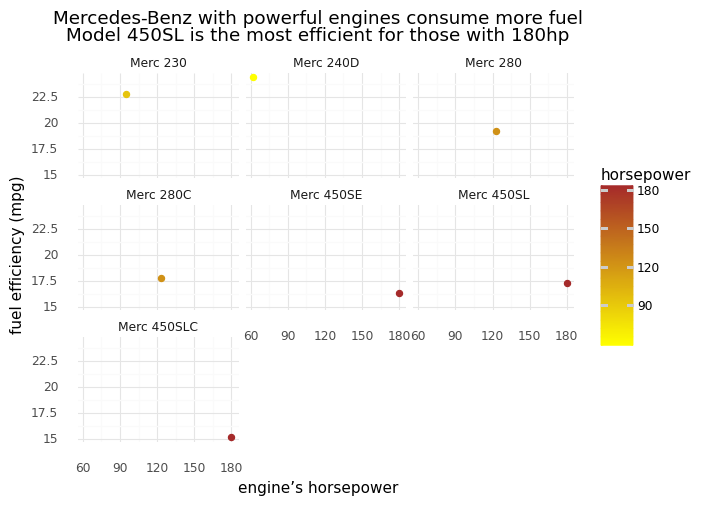

<ggplot: (311049604)>

In [7]:
from plotnine import geom_line, theme_minimal, scale_color_gradient
display(
    ggplot(merc,             
        aes('horsepower', 'mpg', color='horsepower'))
        + scale_color_gradient(low='yellow', high='brown')
        + geom_point(size=2)         
        + theme_minimal()
        + facet_wrap('name')
        + labs(
            title = "Mercedes-Benz with powerful engines consume more fuel\nModel 450SL is the most efficient for those with 180hp",
            y = "fuel efficiency (mpg)",
            x = "engine’s horsepower"
        )
)

**👉Chart 2 Summary**

Replace this text with your summary of the chart above. Be _very_ careful with your language. Use language that is as strong as possible, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far.

**👉Reflection**

What I can conclude based on this chart:
- That among these specific Merc models those with more powerful engines have a less fuel efficency
    
What I can't conclude based on this chart:
- Perhaps generalize this to any other Mercedes-Benz model


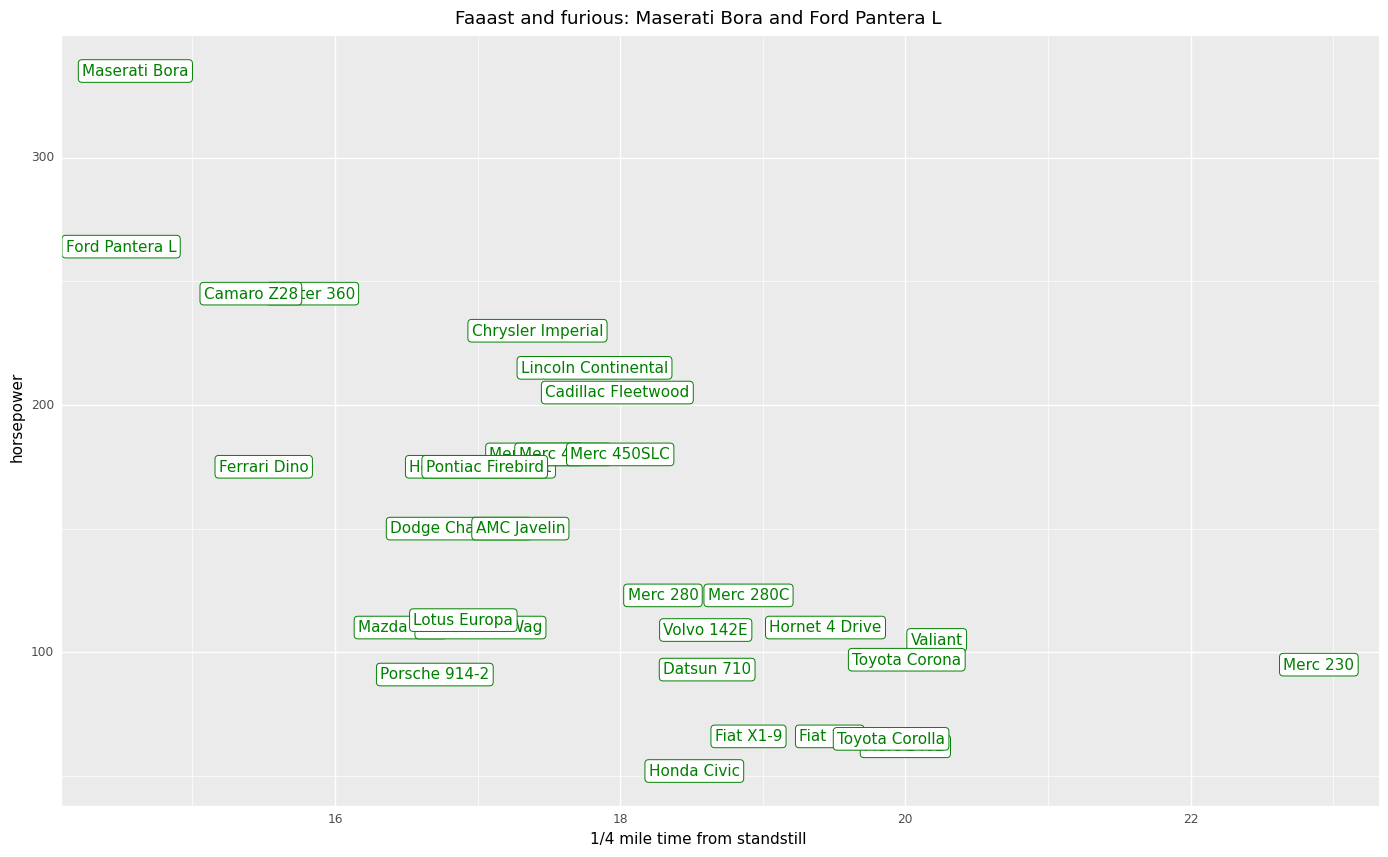

<ggplot: (314159219)>

In [134]:
from plotnine import geom_line, theme_classic, facet_grid, theme_xkcd, element_line, theme, geom_label
display(
    ggplot(mtcars,             
        aes('qsec', 'hp'))
        + geom_point(size=2)         
        + theme(line=element_line(color='white'))
        + theme(figure_size=(17, 10))
        + labs(
            title = "Faaast and furious: Maserati Bora and Ford Pantera L",
            y = "horsepower",
            x = "1/4 mile time from standstill")
        + geom_label(aes(label="name") , data=mtcars,  color='green'))

**👉Chart 3 Summary**

Replace this text with your summary of the chart above. Be _very_ careful with your language. Use language that is as strong as possible, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far.

**👉Reflection**

What I can conclude based on this chart:
- From the cars available on this dataset, two models -one from Ford and the other one from Maserati- have the highest acceleration.
    
What I can't conclude based on this chart:
- That any other model from those brand will operate the same way (obviously)
- That they are the only ones.

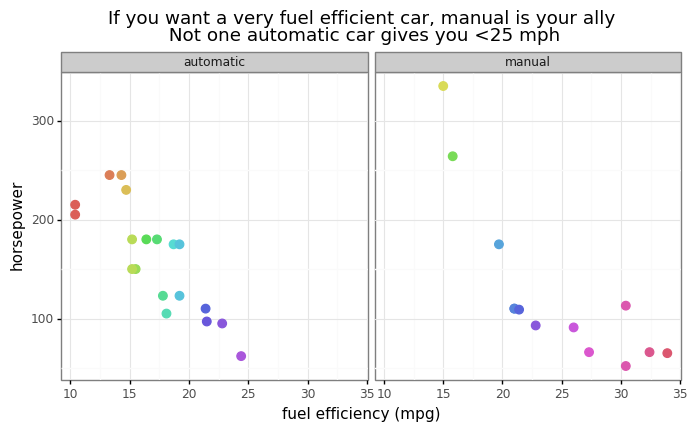

<ggplot: (313094463)>

In [138]:
from plotnine import scale_color_discrete
display(
    ggplot(mtcars,                   # data
        aes('mpg', 'hp', color='factor(mpg)'))         # aesthetics
        + geom_point(size=3)               # geometry
        + theme_bw()
        + scale_color_discrete(guide=False)
        + theme(figure_size=(8, 4))
        + facet_wrap('transmission_type')
        + labs(
            title = "If you want a very fuel efficient car, manual is your ally\n Not one automatic car gives you <25 mph",
            y = "horsepower",
            x = "fuel efficiency (mpg)"))
       # + geom_label(aes(label="name") , data=mtcars))

**👉Chart 4 Summary**

Replace this text with your summary of the chart above. Be _very_ careful with your language. Use language that is as strong as possible, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far.

**👉Reflection**

What I can conclude based on this chart:
- From the cars available on this dataset, there are more options or manual cars extremly fuel efficient
- Most manual cars also enjoy less grosspower
    
What I can't conclude based on this chart:
- Than this is a generalized pattern outsite our sample. 
